In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import interpret


In [2]:
groupped_results = interpret.import_from_dir("../results/dpga-dissim-measures-corr/", lambda args: args["meta"] + " - F" + args["genformat"] + " - " + args["dissimilarity_method"].split('.')[-1])
results_df = interpret.convert_to_dataframe(groupped_results)

In [4]:
print(groupped_results['DPGA - F0 - GENE_LEVENSHTEIN'][1].best_instances[0].genotype)

//0
p:fr=0.686, ing=0.247
p:0.877, 0.006, -0.192, fr=0.548
p:0.305, 0.102, 0.503, fr=0.156, ing=0.131
p:1.294, -1.502, 0.323, fr=0.187
p:0.238, -0.231, -0.356, ing=0.325
p:-0.337, 0.299, -0.072
j:3, 1, stif=0.988
j:2, 3, rotstif=0.92
j:0, 1, stif=0.871, rotstif=0.887
j:4, 0, rotstif=0.989
j:5, 2
n:j=0, d="|:p=0.272, r=0.887"
n:p=2, d=T
c:0, 1, -2.186



In [5]:
results_df

,group,run_idx,gen,nevals,avg,stddev,min,max,m_strength,time_s
0,DPGA - F0 - GENE_LEVENSHTEIN,0,0,40,0.000000,0.000000,0.000000,0.000000,1.0,3800.618665
1,DPGA - F0 - GENE_LEVENSHTEIN,0,1,96,0.000157,0.000899,0.000000,0.005766,1.0,3800.618665
2,DPGA - F0 - GENE_LEVENSHTEIN,0,2,90,0.000637,0.001746,0.000000,0.006183,1.0,3800.618665
3,DPGA - F0 - GENE_LEVENSHTEIN,0,3,98,0.003542,0.002947,0.000101,0.009865,1.0,3800.618665
4,DPGA - F0 - GENE_LEVENSHTEIN,0,4,97,0.005417,0.002118,0.000348,0.009865,1.0,3800.618665
...,...,...,...,...,...,...,...,...,...,...
803,DPGA - F0 - PHENE_STRUCT_OPTIM,0,96,91,60.310978,16.791042,1.628539,67.345311,1.0,20467.998846
804,DPGA - F0 - PHENE_STRUCT_OPTIM,0,97,85,58.024559,21.572443,0.014830,67.345311,1.0,20467.998846
805,DPGA - F0 - PHENE_STRUCT_OPTIM,0,98,92,56.961935,20.559446,0.759534,67.448892,1.0,20467.998846
806,DPGA - F0 - PHENE_STRUCT_OPTIM,0,99,95,56.095149,22.548680,0.309266,67.448892,1.0,20467.998846


In [6]:
custom_colors = {
    "DPGA - F0 - GENE_LEVENSHTEIN": "#006600",
    "DPGA - F0 - PHENE_STRUCT_GREEDY": "#33cc33",
    "DPGA - F0 - PHENE_STRUCT_OPTIM": "#990000",
    "DPGA - F1 - GENE_LEVENSHTEIN": "#ff0000",
}

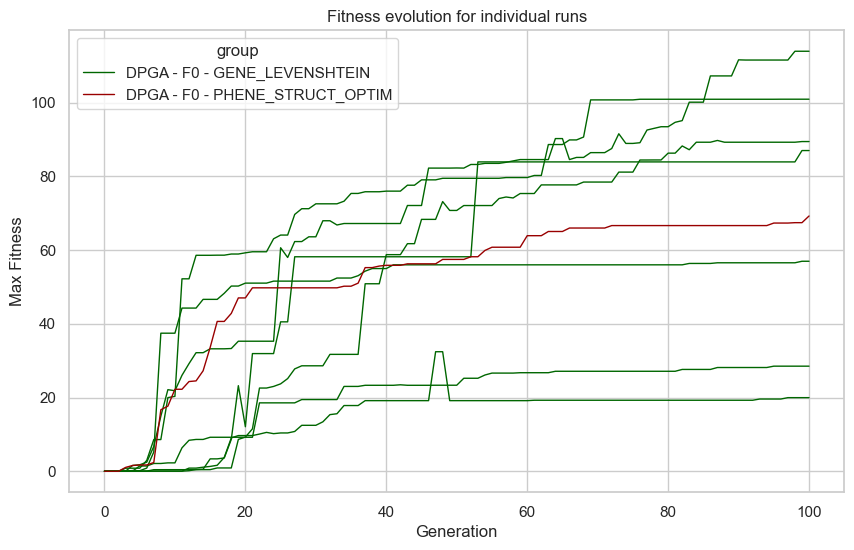

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="gen", y="max", hue="group", data=results_df, units="run_idx", estimator=None, lw=1, palette=custom_colors)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.title("Fitness evolution for individual runs")
plt.show()

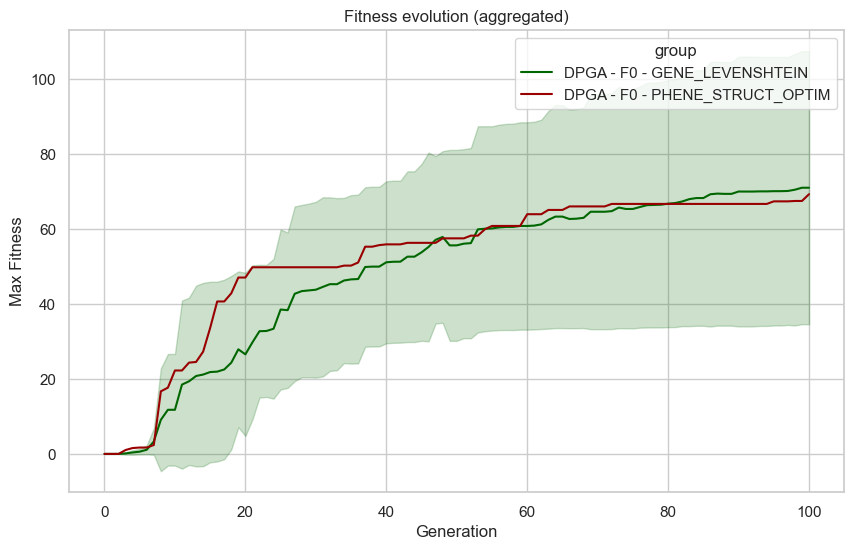

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="gen", y="max", hue="group", data=results_df, errorbar="sd", palette=custom_colors)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.title("Fitness evolution (aggregated)")
plt.show()

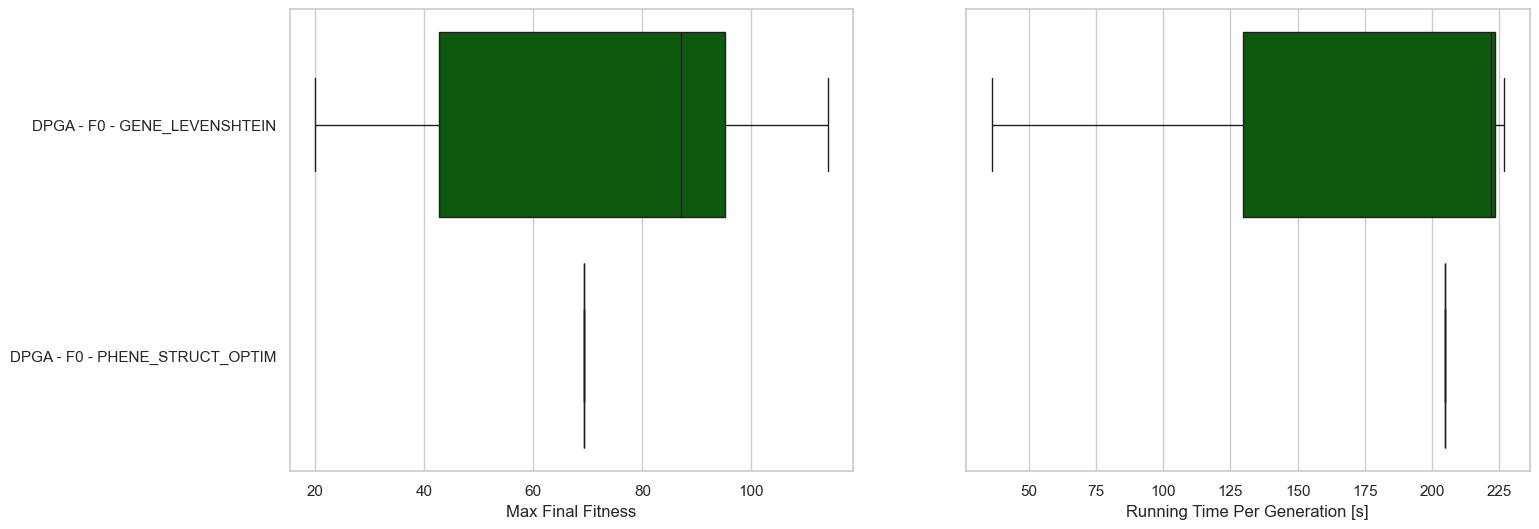

In [9]:
end_results = results_df[results_df["gen"] == results_df["gen"].max()].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(y="group", x="max", data=end_results, palette=custom_colors, hue="group", ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_xlabel("Max Final Fitness")
sns.boxplot(y="group", x="gen_time_s", data=end_results, palette=custom_colors, hue="group", ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_xlabel("Running Time Per Generation [s]")
plt.show()